In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.datasets import mnist

from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
(xTrainMnist, yTrainMnist), (xTestMnist, yTestMnist) = mnist.load_data()
xTrainMnist = xTrainMnist.astype('float32')/255
xTrainMnist = xTrainMnist.reshape(xTrainMnist.shape[0], 28, 28, 1)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
def baseAutoencoder():
    img_input = Input((28,28,1))

    x = Conv2D(32, (3, 3), padding='same', activation='relu')(img_input)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)

    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    z = MaxPooling2D()(x)
    # ужал 7*7

    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(z)
    x = BatchNormalization()(x)

    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)


    x = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

    x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(img_input, x)
    model.compile(optimizer=Adam(),
                  loss='mean_squared_error')

    return model

In [ ]:
def plotImages(startIndex, xTrain, pred): # создадим функцию для вывода изображений как картинок
  n = 5
  plt.figure(figsize=(10, 4))
  for i in range(n):
      index = i + startIndex
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(xTrain[index].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # Показываем восстановленные картинки
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(pred[index].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

In [ ]:
(xSquareMnist, ySquareMnist), (xSquareTestMnist, ySquareTestMnist) = mnist.load_data()

In [ ]:
def addSquare(x): # объявим функцию добавления квадрата

  squareRandomX = np.random.randint(20)
  squareRandomY = np.random.randint(20)

  for i in range(squareRandomX,squareRandomX+8):
    for j in range(squareRandomY,squareRandomY+8):
         x[i,j] = 0

  return x

def Any10Images(startIndex, xTrain):
    n = 10
    plt.figure(figsize=(10,4))
    for i in range(n):
      index = i + startIndex
      ax = plt.subplot(2,n,i+1)
      plt.imshow(xTrain[index].reshape(28,28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

    plt.show()

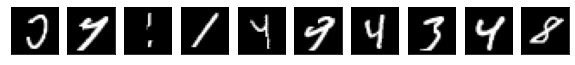

In [ ]:
for i in range(0,12000):
  xSquareMnist[i] = addSquare(xSquareMnist[i])

Any10Images(1000,xSquareMnist)


In [ ]:
modelDeSquare = baseAutoencoder()
modelDeSquare.fit(xSquareMnist[:10000], xTrainMnist[:10000], epochs=30, batch_size=100, validation_data = (xSquareMnist[10000:12000], xTrainMnist[10000:12000]))

Epoch 1/30
100/100 [==============================] - 3s 24ms/step - loss: 0.0440 - val_loss: 0.0388
Epoch 2/30
100/100 [==============================] - 2s 21ms/step - loss: 0.0125 - val_loss: 0.0139
Epoch 3/30
100/100 [==============================] - 2s 21ms/step - loss: 0.0093 - val_loss: 0.0097
Epoch 4/30
100/100 [==============================] - 2s 21ms/step - loss: 0.0077 - val_loss: 0.0074
Epoch 5/30
100/100 [==============================] - 2s 21ms/step - loss: 0.0069 - val_loss: 0.0074
Epoch 6/30
100/100 [==============================] - 2s 21ms/step - loss: 0.0062 - val_loss: 0.0070
Epoch 7/30
100/100 [==============================] - 3s 26ms/step - loss: 0.0058 - val_loss: 0.0070
Epoch 8/30
100/100 [==============================] - 2s 21ms/step - loss: 0.0055 - val_loss: 0.0059
Epoch 9/30
100/100 [==============================] - 2s 23ms/step - loss: 0.0052 - val_loss: 0.0070
Epoch 10/30
100/100 [==============================] - 2s 21ms/step - loss: 0.0049 - val_lo

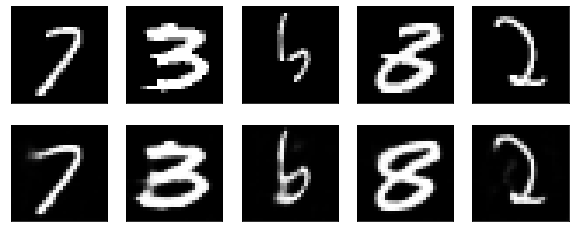

In [ ]:
predMnistDeSquare = modelDeSquare.predict(xSquareMnist[:12000])
predMnistDeSquare = predMnistDeSquare * 255
predMnistDeSquare = predMnistDeSquare.astype('uint8')

plotImages(10510, xSquareMnist, predMnistDeSquare)

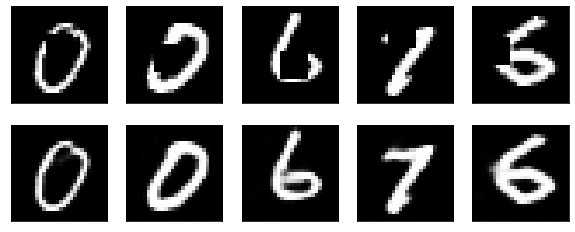

In [ ]:
plotImages(10530, xSquareMnist, predMnistDeSquare)